In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
try:
    os.chdir('../data/preprocess0506/processed')
except:
    pass

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [49]:
# daily_vars = pd.read_csv('./daily_vars.csv', parse_dates=['date']).sort_values(['ticker','date']).set_index('date')
# firms = pd.read_csv('../final_processed/firm_ratios.csv',  parse_dates=['date']).sort_values(['ticker','date']).set_index('date')
# finratios = pd.read_csv('./finratio.csv').sort_values(['ticker','date']).set_index('date')
# sectors = pd.read_csv('./sectors.csv').sort_values(['ticker','date']).set_index('date')
# short_rate = pd.read_csv('./short_interest_rate.csv').sort_values(['ticker','date']).set_index('date')

# col_remove = ['gvkey','permno','adate','qdate', 'ffi5_desc', 'ffi5', 'ffi10_desc', 'ffi10', 'ffi12_desc', 'ffi12',
#  'ffi17_desc', 'ffi17', 'ffi30_desc', 'ffi30', 'ffi38_desc', 'ffi38',
#  'ffi48_desc', 'ffi48', 'ffi49_desc', 'ffi49', 'cusip', 'gsector', 'price']
# firms[[i for i in firms.columns if i not in col_remove]].to_csv('../final_processed/firm_ratios.csv')

In [50]:
firms = pd.read_csv('../final_processed/firm_ratios.csv',  parse_dates=['date']).sort_values(['ticker','date']).set_index('date')
prices = pd.read_csv('../final_processed/daily_prices.csv', parse_dates=['date']).sort_values(['ticker','date']).set_index('date')

/var/folders/1t/_7p_zm4x449blqs7bvqvb0rm0000gn/T/ipykernel_21300/1676115886.py:1: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  firms = pd.read_csv('../final_processed/firm_ratios.csv',  parse_dates=['date']).sort_values(['ticker','date']).set_index('date')


In [51]:
prices.loc['2000-01':'2000-03']

/var/folders/1t/_7p_zm4x449blqs7bvqvb0rm0000gn/T/ipykernel_21300/1194352828.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  prices.loc['2000-01':'2000-03']


,ticker,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2000-01-03,AABA,442.90,475.90,429.50,475.00,9617400.0,0.0,1.0,30.421698,32.688385,29.501285,32.626567,38469600.0
2000-01-04,AABA,464.50,500.10,442.00,443.00,17467200.0,0.0,1.0,31.905348,34.350623,30.359879,30.428566,69868800.0
2000-01-05,AABA,430.50,431.10,402.00,420.30,20798700.0,0.0,1.0,29.569973,29.611185,27.612379,28.869360,83194800.0
2000-01-06,AABA,406.30,413.00,361.00,368.20,17825300.0,0.0,1.0,27.907735,28.367941,24.796191,25.290741,71301200.0
2000-01-07,AABA,366.80,408.00,363.00,407.30,12249900.0,0.0,1.0,25.194578,28.024504,24.933566,27.976422,48999600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-03-27,YUM,29.94,30.31,29.69,29.69,998900.0,0.0,1.0,3.595731,3.640168,3.565707,3.565707,3995600.0
2000-03-28,YUM,29.69,29.75,28.75,29.50,634700.0,0.0,1.0,3.565707,3.572913,3.452815,3.542888,2538800.0
2000-03-29,YUM,29.31,29.63,29.00,29.00,680000.0,0.0,1.0,3.520070,3.558501,3.482839,3.482839,2720000.0


In [21]:
sample1 = firms.loc['2001']
sample2 = prices.loc['2001']

In [22]:
data = pd.merge(sample2, sample1, on=['ticker','date'], how='left')

In [24]:
data_count = data.groupby('ticker').count()

<Axes: >

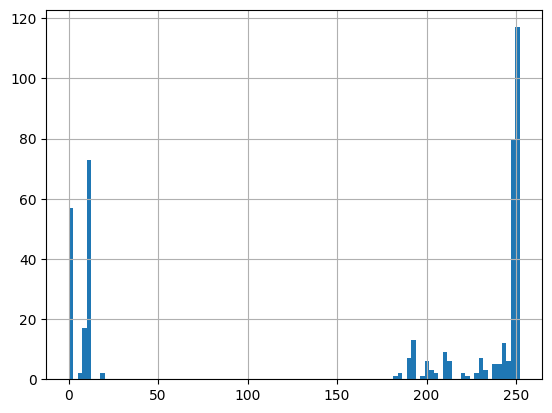

In [43]:
sample1.groupby('ticker').count().mean(axis=1).hist(bins=100)

2000


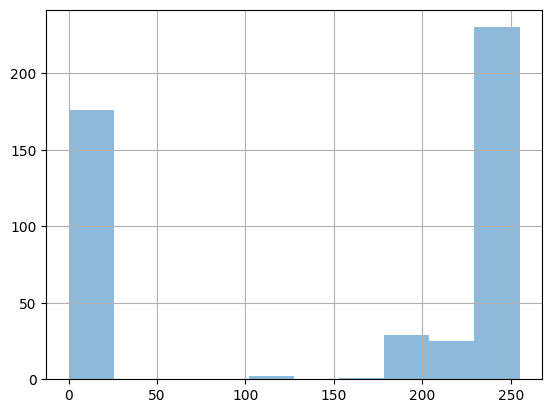

2001


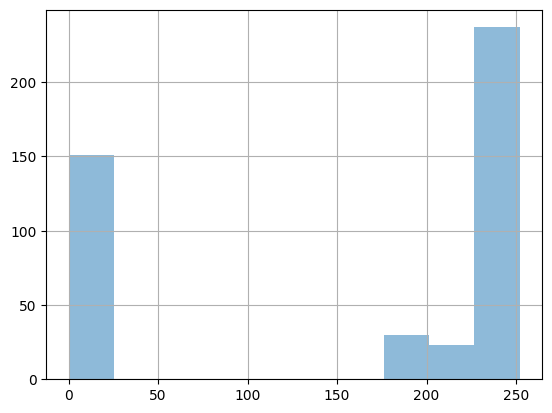

2002


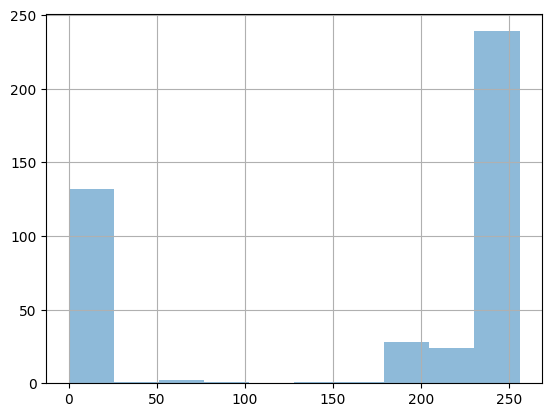

2003


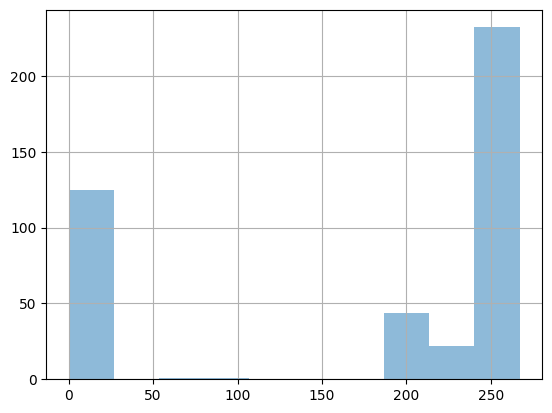

2004


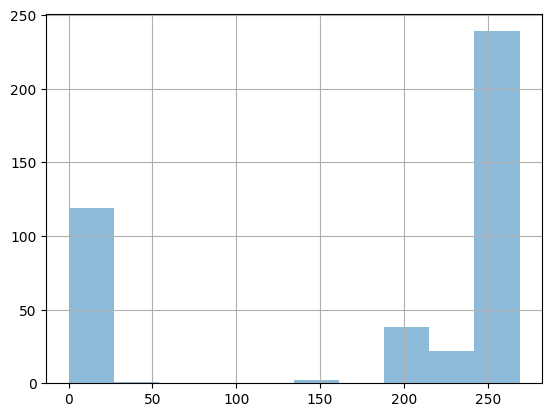

2005


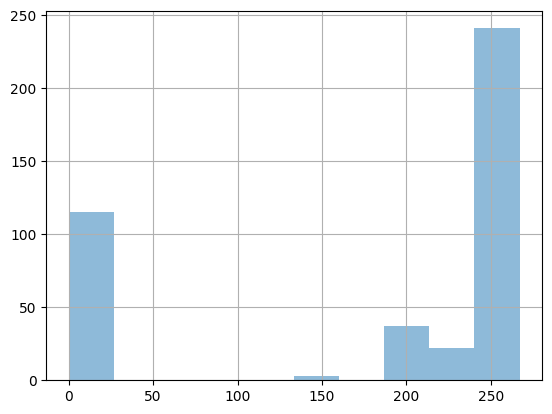

2006


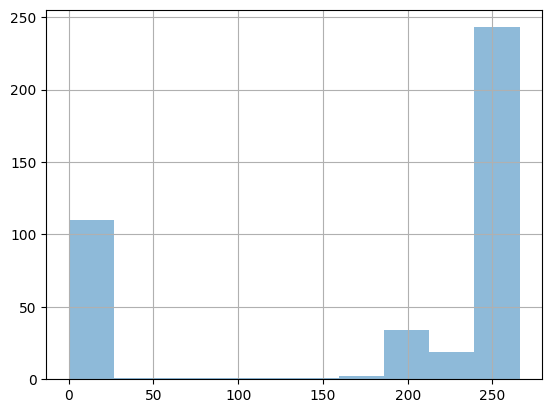

2007


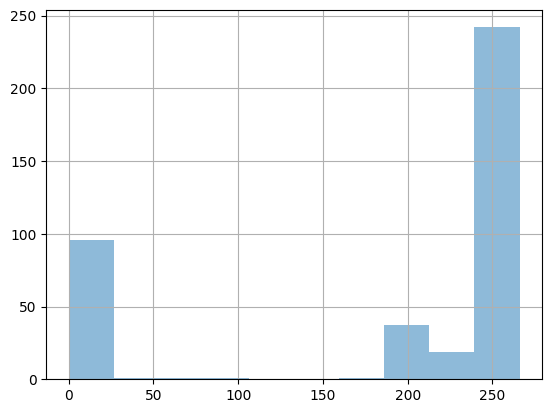

2008


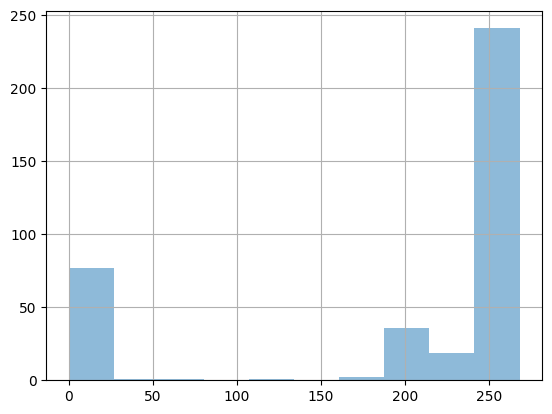

2009


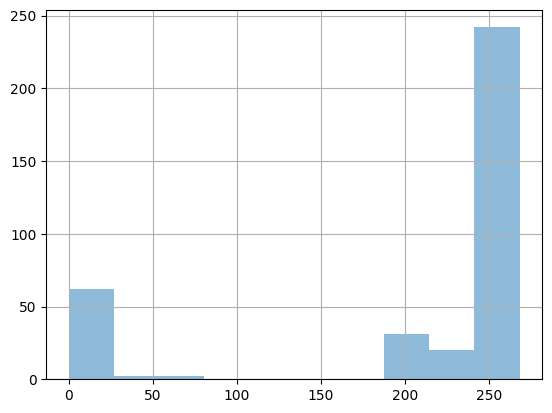

2010


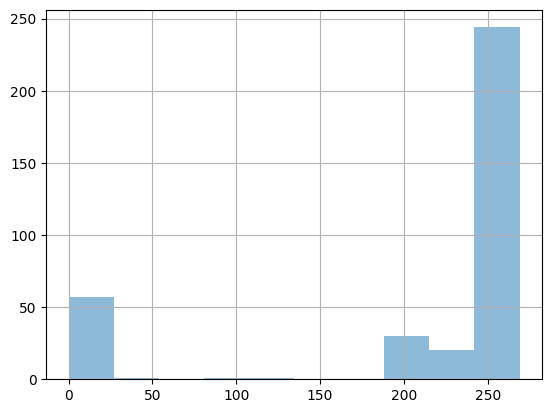

2011


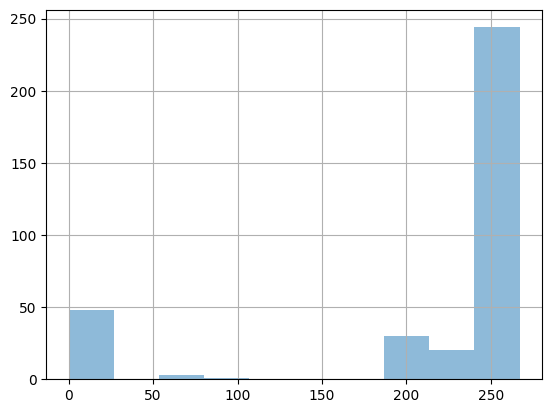

2012


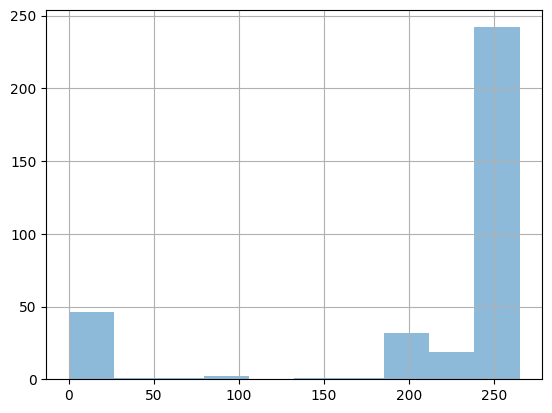

2013


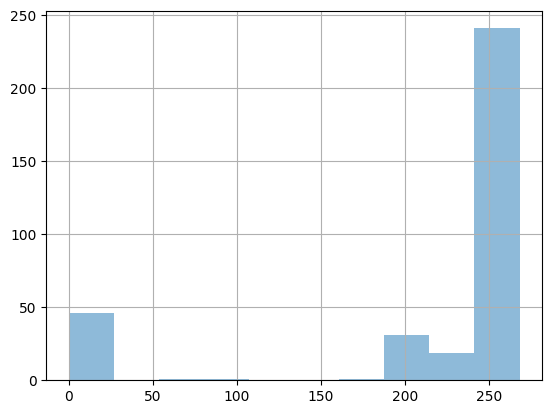

2014


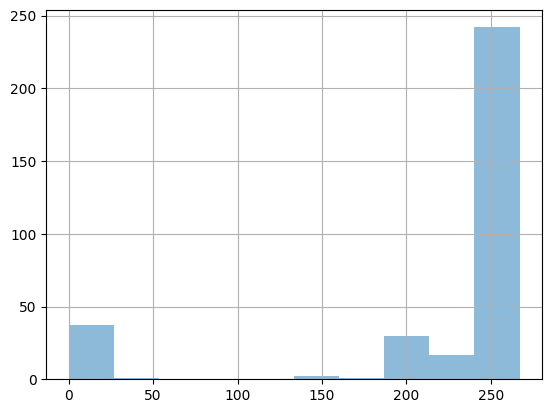

2015


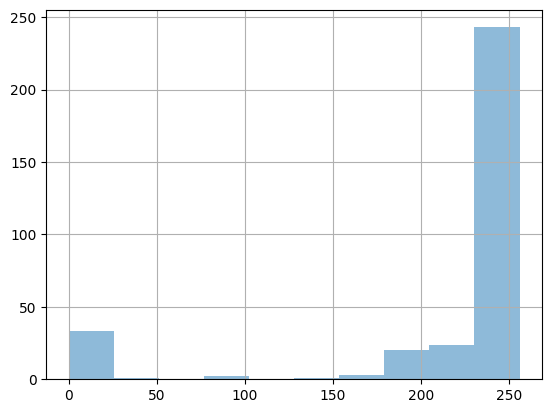

2016


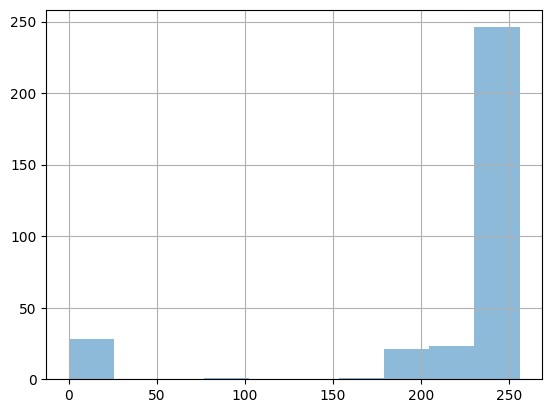

2017


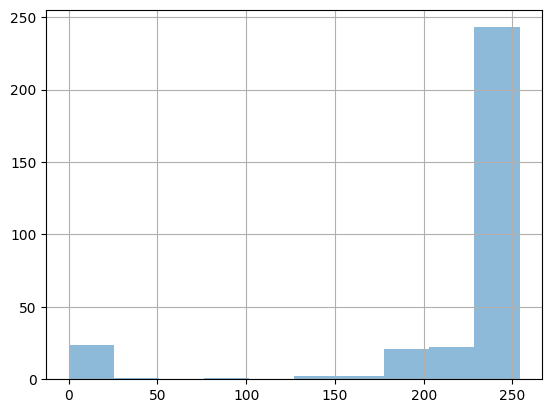

2018


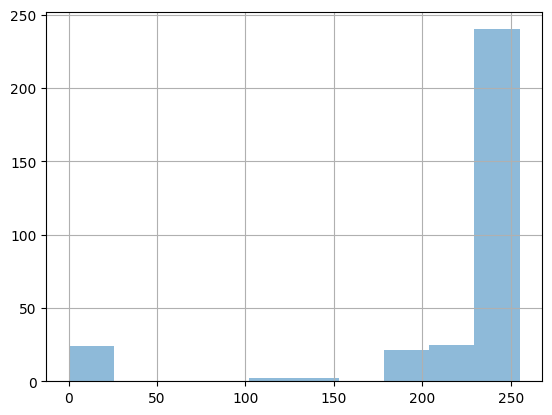

2019


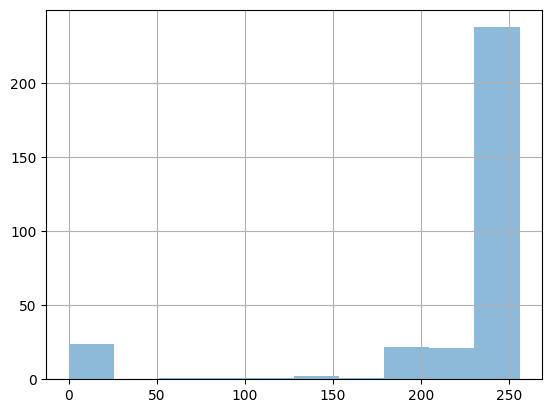

In [47]:
for i in range(2000, 2020):
    y = str(i)
    sample1 = firms.loc[y]
    data_count = sample1.groupby('ticker').count().mean(axis=1)
    print(y)
    data_count.hist(bins=10, alpha=0.5)
    plt.show()